In [ ]:
from tensorflow.keras import layers, models, datasets
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
#One Hot Encoding Labels from Train/Test Dataset

num_classes = 10

train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [ ]:
# split data

train_images, val_images, train_labels, val_labels = train_test_split(train_images,train_labels, test_size=0.1, random_state=42)

## Model 4

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import GlobalMaxPooling2D

IMG_SHAPE = (32, 32, 3)

base_model = MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = True

for layer in base_model.layers[:100]:
  layer.trainable =  False


maxpool_layer = GlobalMaxPooling2D()
prediction_layer = Dense(units=10, activation='softmax')

model = Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])
num_epochs = 10
fine_tune_epochs = 30
total_epochs =  num_epochs + fine_tune_epochs

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 1,874,250
Non-trainable params: 396,544
_________________________________________________________________


In [ ]:
history4 = model.fit(train_images, train_labels, batch_size = 64, epochs = 20, validation_data=(val_images, val_labels))

Epoch 1/20
704/704 [==============================] - 37s 22ms/step - loss: 1.3970 - accuracy: 0.5304 - val_loss: 6.2171 - val_accuracy: 0.2642
Epoch 2/20
704/704 [==============================] - 15s 21ms/step - loss: 1.1308 - accuracy: 0.6253 - val_loss: 3.1345 - val_accuracy: 0.4040
Epoch 3/20
704/704 [==============================] - 15s 21ms/step - loss: 0.9904 - accuracy: 0.6668 - val_loss: 1.8847 - val_accuracy: 0.5590
Epoch 4/20
704/704 [==============================] - 14s 20ms/step - loss: 0.9454 - accuracy: 0.6806 - val_loss: 1.9929 - val_accuracy: 0.5972
Epoch 5/20
704/704 [==============================] - 14s 19ms/step - loss: 0.9645 - accuracy: 0.6811 - val_loss: 2.3375 - val_accuracy: 0.4848
Epoch 6/20
704/704 [==============================] - 14s 20ms/step - loss: 0.9643 - accuracy: 0.6823 - val_loss: 1.7195 - val_accuracy: 0.5978
Epoch 7/20
704/704 [==============================] - 14s 20ms/step - loss: 0.8891 - accuracy: 0.7012 - val_loss: 1.2964 - val_accuracy:

In [ ]:
batch_size = 256

test_loss4, test_accuracy4 = model.evaluate(test_images, test_labels, batch_size=batch_size)
print("Test Loss:{:.2f}%".format(test_loss4))
print("Test Accuracy: {:.2f}%".format(test_accuracy4))

40/40 [==============================] - 1s 22ms/step - loss: 1.1053 - accuracy: 0.7002
Test Loss:1.11%
Test Accuracy: 0.70%


In [ ]:
val_loss4, val_accuracy4 = model.evaluate(val_images, val_labels, verbose=2)
print("Valid. Loss:{:.2f}%".format(val_loss4))
print("Valid. Accuracy:{:.2f}%".format(val_accuracy4))

157/157 - 2s - loss: 1.0347 - accuracy: 0.7122 - 2s/epoch - 10ms/step
Valid. Loss:1.03%
Valid. Accuracy:0.71%


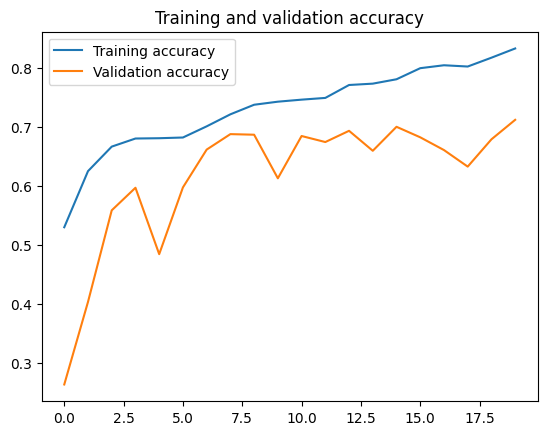

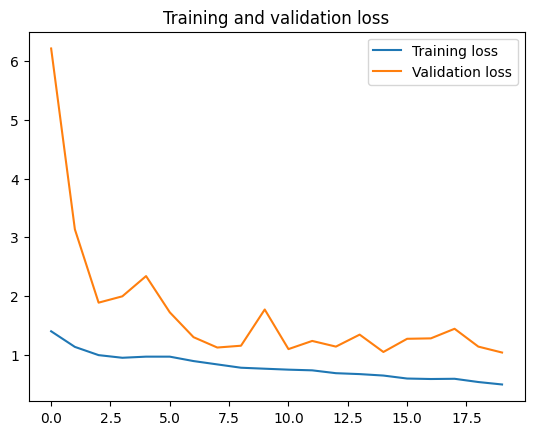

In [ ]:
acc = history4 .history['accuracy']
val_acc = history4 .history['val_accuracy']
loss = history4 .history['loss']
val_loss = history4 .history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()